## Seed Data introduction
- Measurements of geometrical properties of kernels belonging to three different varieties of wheat.
  Data have three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected     for the experiment
  To construct the data , seven parameter are used for measurement:
  1. Area- A
  2. Perimeter -P
  3. Compactness -C
  4. Length of kernel - LK
  5. Width of the kernel - WK
  6. Assemetry coefficient - A_Coef
  7. Length of the kernel groove - LKG
  
  target features:
  Target

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)


In [5]:
data=pd.read_csv('Seed_Data.csv')
print(data.shape)
data.head()

(210, 8)


,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


#### - Data contain the 210 example and 8 feature in which 7 are independent feature and one is target features

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
 7   target  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


#### Here there are not nan value present in the dataset so we not not apply any missing value meaturement technique. now we check for describe feature .It contrain the count, mean , standard devaition , q1 quantile(25%) , median(50%), q3 quantile(75%) and maximum method which are used gives the best infomation about the dataset.

In [8]:
data.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


<AxesSubplot:>

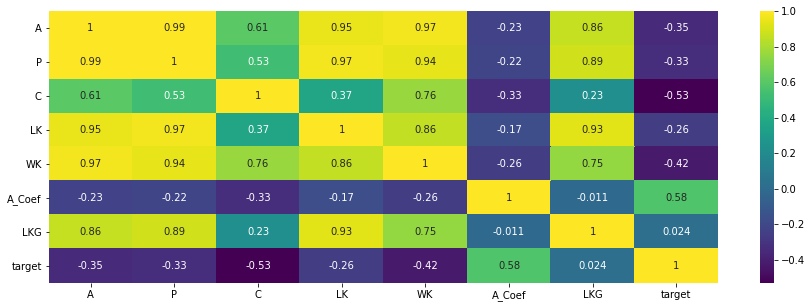

In [11]:
## now we will check the correlation between the independent feature and target feature.
## For this we use the heatmap() method in the seaborn (data visualization).Coorelation are used only for numerical feature
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [12]:
## Now independent feature are very highly correleated to each other. Now consider these feature
## A and P are very highly correlated so drop one of them - drop A
data.drop('A', axis=1, inplace=True)

<AxesSubplot:>

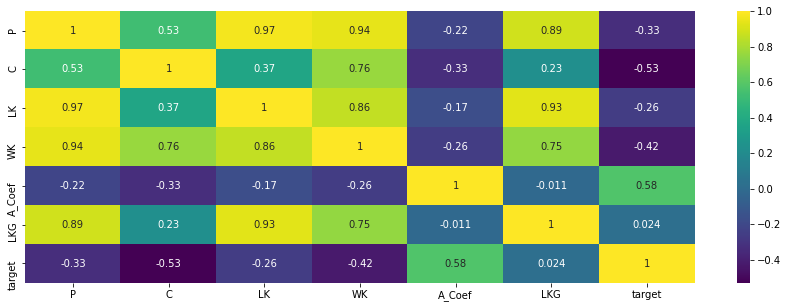

In [13]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [14]:
## here P and LK are highly 
data1=data.drop('P', axis=1)

<AxesSubplot:>

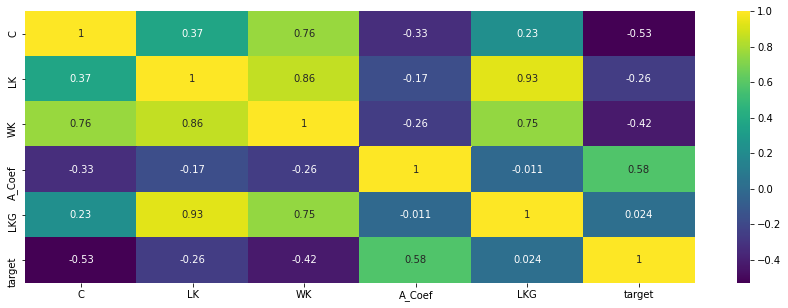

In [15]:
plt.figure(figsize=(15,5))
sns.heatmap(data1.corr(), annot=True, cmap='viridis')

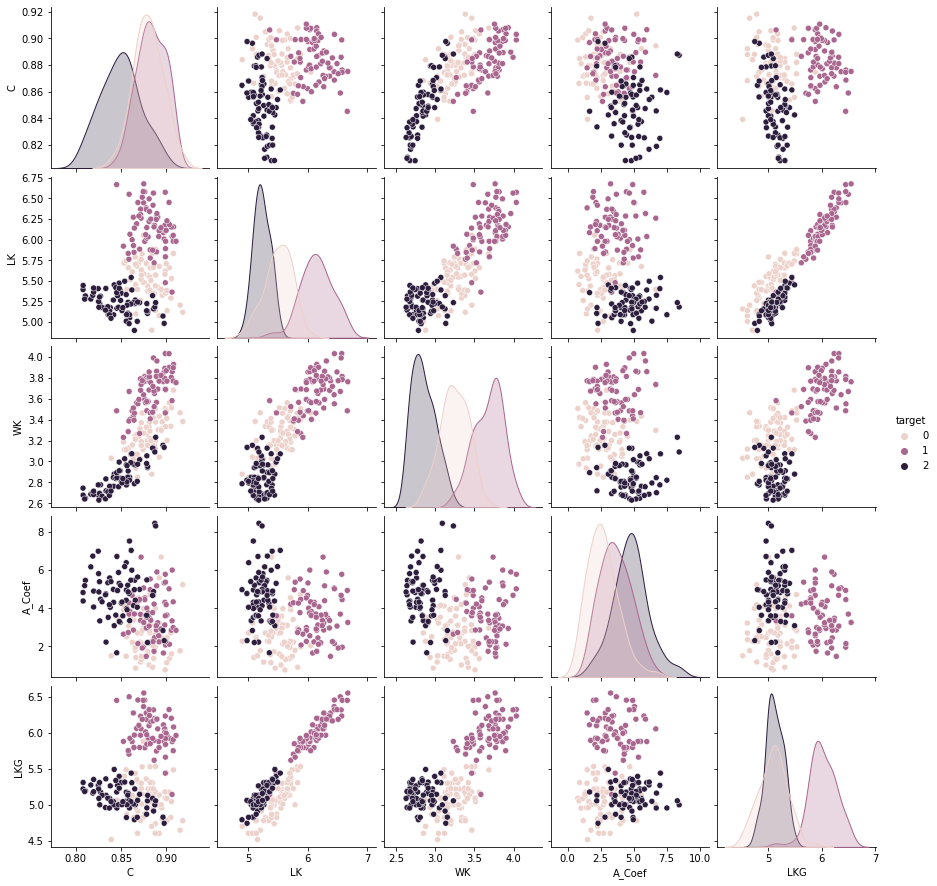

In [16]:
## check the pairplot 
sns.pairplot(data1, hue='target')

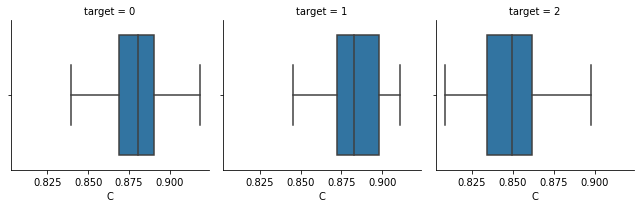

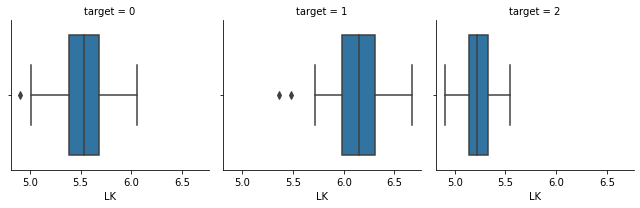

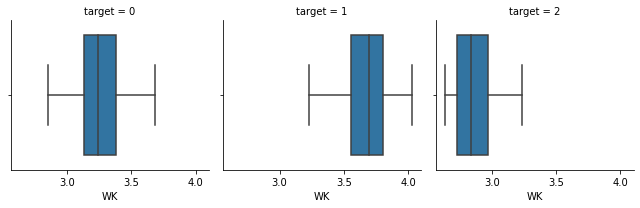

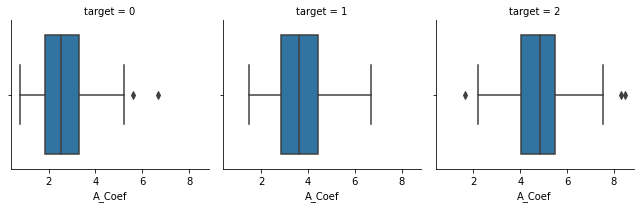

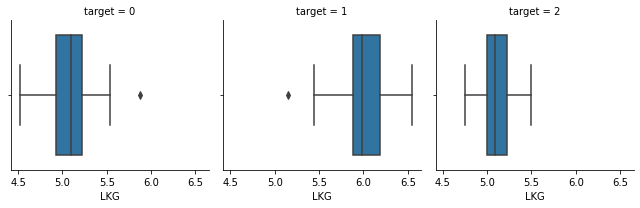

In [24]:
## check the outlier for the data with the target so we use the facet grid plot 
s=sns.FacetGrid(data1, col='target')
s.map(sns.boxplot, 'C')

s=sns.FacetGrid(data1, col='target')
s.map(sns.boxplot, 'LK')

s=sns.FacetGrid(data1, col='target')
s.map(sns.boxplot, 'WK')

s=sns.FacetGrid(data1, col='target')
s.map(sns.boxplot, 'A_Coef')

s=sns.FacetGrid(data1, col='target')
s.map(sns.boxplot, 'LKG')

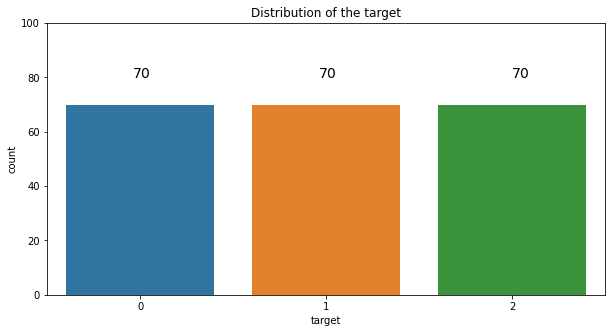

In [29]:
## check for the target feature 
plt.figure(figsize=(10,5))
plt.title("Distribution of the target")
sns.countplot(x=data1['target'])
target_count=data1.target.value_counts()
plt.annotate(s=target_count[0], xy=(-0.04, 10 + target_count[0]), size=14)
plt.annotate(s=target_count[1],xy=(0.96, 10 + target_count[1]), size=14)
plt.annotate(s=target_count[2],xy=(2.0, 10 + target_count[2]), size=14)
plt.ylim(0,100)
plt.show()


In [30]:
### here target feature contain 210 entries in which 70 entires -0, 70 -1, 70-2 means that equal 
### entries for the target categories

In [31]:
## now convert the data into dependent and independent 
X=data1.drop('target', axis=1)
y=data1['target']
X.shape, y.shape

((210, 5), (210,))

In [33]:
## now splot the data into train and test data set
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [34]:
x_train,x_test, y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)


## KNN
- K-nearest neighbors is one of the most basic yet important classification algorithms in machine learning.
  KNNs belong to the supervised learning .

In [40]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train ,y_train)
print("training set score : ",knn.score(x_train,y_train))
print("testing set score : {}".format(knn.score(x_test, y_test)))

training set score :  0.9387755102040817
testing set score : 0.8888888888888888


In [85]:
acc_knn=knn.score(x_test, y_test)

## Logistic Regression
- Logistic regression is a supervised learning classification algorithm wont to predict the probability of a target variable.We write the equation for logistic regression as follows:
  y = e^(b0 + b1*x) / (1 + e^(b0 + b1*x))



In [79]:
logistic=LogisticRegression(C=2)
logistic.fit(x_train ,y_train)
print("training set score : ",logistic.score(x_train,y_train))
print("testing set score : {}".format(logistic.score(x_test, y_test)))
accuracy_log=logistic.score(x_test, y_test)

training set score :  0.9523809523809523
testing set score : 0.9206349206349206


In [52]:
y_pred=logistic.predict(x_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("classification report : {} \n ".format(classification_report(y_test, y_pred)))
print('confusion matrix  : {} \n '.format(confusion_matrix(y_test, y_pred)))
print('accuracy score : {} \n '.format(accuracy_score(y_test, y_pred)))

classification report :               precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       1.00      0.95      0.98        21
           2       0.91      0.91      0.91        22

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63
 
 
confusion matrix  : [[18  0  2]
 [ 1 20  0]
 [ 2  0 20]] 
 
accuracy score : 0.9206349206349206 
 


In [80]:
accuracy_log=logistic.score(x_test, y_test)

## SVC
   Support Vector Machines are a type of supervised machine learning algorithm that provides analysis of data for classification and regression analysis.
It contain three parts :
1. Hyperplane   -classifier the data into classier into +ve and -ve 
2. Support vector- those vector which is nearest to the hyperplane and drwa a line by passing its vector
3. Margin-  maximum distance between the two two hyperplane


In [63]:
svm=SVC(C=4, gamma=1)
svm.fit(x_train ,y_train)
print("training set score : ",svm.score(x_train,y_train))
print("testing set score : {}".format(svm.score(x_test, y_test)))

training set score :  0.9659863945578231
testing set score : 0.9047619047619048


In [81]:
acc_svm=svm.score(x_test, y_test)

## Decision tree classifier
  Decision Tree algorithms are used for both predictions as well as classification in machine learning.
  Using the decision tree with a given set of inputs, one can map the various outcomes that are a result of the consequences or decisions.



In [71]:
tree=DecisionTreeClassifier(max_depth=3)
tree.fit(x_train ,y_train)
print("training set score : ",tree.score(x_train,y_train))
print("testing set score : {}".format(tree.score(x_test, y_test)))

training set score :  0.9659863945578231
testing set score : 0.8888888888888888


In [82]:
acc_tree=tree.score(x_test, y_test)

## SGD classifier
  Stochastic Gradient Descent (SGD) is a class of machine learning algorithms that is apt for large-scale learning.It is an efficient approach towards discriminative learning of linear classifiers under the convex loss function which is linear (SVM) and logistic regression.



In [78]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(alpha=0.01, shuffle=True, random_state=42)
sgd.fit(x_train ,y_train)
print("training set score : ",sgd.score(x_train,y_train))
print("testing set score : {}".format(sgd.score(x_test, y_test)))

training set score :  0.8979591836734694
testing set score : 0.8888888888888888


In [83]:
acc_agd=sgd.score(x_test, y_test)

## Naive bayes Classifier
   Naïve Bayes algorithm is a supervised learning algorithm, which is predicated on Bayes theorem and            used for solving classification problems.
   It is an extension of the Bayes theorem wherein each feature assumes independence.
   Using this, one can perform a multi-class prediction.


In [74]:
from  sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train ,y_train)
print("training set score : ",nb.score(x_train,y_train))
print("testing set score : {}".format(nb.score(x_test, y_test)))

training set score :  0.9455782312925171
testing set score : 0.9047619047619048


In [84]:
acc_nb=nb.score(x_test, y_test)

In [86]:
model=['LogisticRegression' ,'KNN', 'SVC', 'Decision tree classifier', 'SGD classifier', 'Naive Bayes']
accuracy=[accuracy_log,acc_knn,acc_svm,acc_tree, acc_agd, acc_nb]
result=pd.DataFrame({'Model':model, 'Accuracy':accuracy})
result

,Model,Accuracy
0,LogisticRegression,0.920635
1,KNN,0.888889
2,SVC,0.904762
3,Decision tree classifier,0.888889
4,SGD classifier,0.888889
5,Naive Bayes,0.904762


In [ ]:
## Logistic regression gives the best accuracy of the model.